# Merging of Metabolic Network Graphs

The purpose of this notebook is to identify criteria for classifying GFMs (without 16S sequence data) as members of a particular tribe, based on shared amino acid identity (ANI). The metabolic models of these genomes will then be merged to give a model which is better representative of a particular tribe. Our reverse ecology analysis will then be performed on these merged models.

## Merging Genomes Based on ANI
Pairwise ANI were computed by Sarah using the method in Goris et al IJSEM 2007. This notebook examines pairwise ANI values between all members within a tribe to identify a minimum ANI criterion for adding a new genome to the tribe. Then I identify genomes which are candidates for inclusion within a tribe (based on phylogeny) and determine whether or not they can be included within a tribe (based on ANI).

#### References
1. Konstantinidis, K. T., & Tiedje, J. M. (2005). Genomic insights that advance the species definition for prokaryotes. Proceedings of the National Academy of Sciences, 102(7), 2567–2572.
2. Goris, J., Konstantinidis, K. T., Klappenbach, J. A., Coenye, T., Vandamme, P., & Tiedje, J. M. (2007). DNA-DNA hybridization values and their relationship to whole-genome sequence similarities. International Journal of Systematic and Evolutionary Microbiology, 57(1), 81–91.

#### Note
I currently do not have ANI computed for the newest CSP. When I have this data from Sarah, update this code and functions to rely on a single taxonomySAGs.file

The first chunk of code identifies imports the Python packages necessary for this analysis.

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import pairwiseANIFunctions as ANI

# Define local folder structure for data input and processing.
externalDataDir = 'ExternalData'

### All SAGs and GFMs

I want to identify an ANI cutoff, such that any two genomes belonging to the same tribe have an ANI greater than this value. The function below computes the minimum and maximum pairwise ANI for all genomes belonging to the same tribe.

In [2]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')
ANI.sameTribePairwiseANI(externalDataDir, pairwiseANI, taxonClass, tribes)

,Samples,Num Samples,Max ANI,Min ANI
Myco,[MEint.metabat.10152],1,NaN,NaN
acI-A1,"[AAA027M14, AAA278O22]",2,79.71,79.56
acI-A6,[AAA028I14],1,NaN,NaN
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,96.28,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,99.1,79.06
acI-B2,"[TBepi.metabat.2754, TBhypo.metabat.680]",2,99.51,99.48
acI-B4,"[AAA044D11, MEint.metabat.4252]",2,84.45,84.36
acSTL-A1,"[AAA027D23, MEint.metabat.6647]",2,72.53,71.9
acTH1-A1,[AAA028N15],1,NaN,NaN


These data indicate considerable variation between members of the same tribe, and suggest a cutoff of 71.9% ANI for inclusion of a genome in a given tribe. But before we get carried away, let's evaluate the maximum pairwise ANI between all members of different tribes as well.

In [3]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')
ANI.diffTribePairwiseANI(externalDataDir, pairwiseANI, taxonClass, tribes)

,Max ANI,Min ANI
Myco,83.69,0
acI-A1,80.92,0
acI-A6,81.73,64.75
acI-A7,85.26,63.25
acI-B1,85.79,0
acI-B2,74.08,0
acI-B4,81.27,0
acSTL-A1,96.42,0
acTH1-A1,96.13,0


These data suggest that that requiring a similarity of 71.9% ANI for membership in a tribe is far too low, as members of different tribes can have pairwise ANI as high as 96%.

### SAGs Only

Let's see what happens when we run the analysis using only our SAGs.

In [4]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir, pairwiseANI, taxonClass, tribes)

,Samples,Num Samples,Max ANI,Min ANI
acI-A1,"[AAA027M14, AAA278O22]",2,79.71,79.56
acI-A6,[AAA028I14],1,NaN,NaN
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,96.28,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,99.1,79.06
acI-B4,[AAA044D11],1,NaN,NaN
acSTL-A1,[AAA027D23],1,NaN,NaN
acTH1-A1,[AAA028N15],1,NaN,NaN


In [5]:
ANI.diffTribePairwiseANI(externalDataDir, pairwiseANI, taxonClass, tribes)

,Max ANI,Min ANI
acI-A1,80.92,0
acI-A6,79.07,64.75
acI-A7,85.26,66.4
acI-B1,85.79,67.83
acI-B4,78.73,71.03
acSTL-A1,96.42,67.51
acTH1-A1,96.13,68.26


The ANI obtained from within tribe calculations has increaed to 79%. But ANI from across tribes suggest the cutoff is still too low, as members of different tribes can still have pairwise ANI as high as 96%.

### Tribe-specific Cut-offs

Instead let's use a tribe-specific ANI cutoff. Using sequences obtained from SAGs only, the cutoffs will be given by the 'Min ANI' value in the following table:
<table>
    <tr> <td>Tribe</td> <td>Max ANI</td> <td>Min ANI</td> </tr>
    <tr> <td>acI-A1</td> <td>79.71</td> <td>79.56</td> </tr>
    <tr> <td>acI-A7</td> <td>96.28</td> <td>87.13</td> </tr>
    <tr> <td>acI-B1</td> <td>99.1</td> <td>79.06</td> </tr>
</table>
For example, a new candidate genome for tribe acI-A1 must have pairwise ANI of 79.56 or greater to the existing acI-A1 genomes.

Take a look at our phylogenetic tree and identify opportunities to merge genomes. A new genome which gets added to the tribe must:
* have ANI above the tribe-specific cutoff
* maintain the tribe as a monophylogenetic group

![Phylogenetic tree](imageFiles/2014-12-01 Actinos Tree-RAxML.png)

First we will define a function to compute the minimum pairwise ANI within a particular tribe. The function will also compute the minimum pairwise ANI with the new genome added. If this value is lower than the first, then the additional genome is too divergent to be added to the tribe.

One candidate for addition to a tribe is MEint2297 to tribe acI-A1. Let's check it out:

In [6]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')
ANI.addGenomeToTribe(pairwiseANI, taxonClass, tribes, 'acI-A1', 'MEint.metabat.2297')

                    AAA027M14  AAA278O22  MEint.metabat.2297
AAA027M14                 NaN      79.56               75.47
AAA278O22               79.71        NaN               75.62
MEint.metabat.2297      75.66      75.52                 NaN
79.56

The ANI cutoff for the tribe acI-A1 is: 79.56

When genome MEint.metabat.2297 is added, the min pairwise ANI becomes: 75.47


The GFM has a smaller pairwise ANI than the acI-A1 SAGs, so it will not get added to the acI-A1 tribe.

Another candidate for inclusion is MEint.283 to the tribe acI-B1.

In [7]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')
ANI.addGenomeToTribe(pairwiseANI, taxonClass, tribes, 'acI-B1', 'MEint.metabat.6647')

                    AAA023D18  AAA027J17  AAA027L06  AAA028A23  AAA278I18  \
AAA023D18                 NaN      80.03      80.04      80.32      80.94   
AAA027J17               79.88        NaN      81.85      81.88      80.10   
AAA027L06               80.01      81.76        NaN      99.08      79.44   
AAA028A23               80.01      81.74      99.10        NaN      79.32   
AAA278I18               80.96      80.17      79.60      79.57        NaN   
AB141P03                79.56      80.88      96.44      96.36      79.13   
MEint.metabat.6647      62.87      69.79      69.52      71.68      70.08   

                    AB141P03  MEint.metabat.6647  
AAA023D18              79.45               64.43  
AAA027J17              80.68               71.68  
AAA027L06              96.46               68.89  
AAA028A23              96.41               71.73  
AAA278I18              79.06               68.24  
AB141P03                 NaN               69.08  
MEint.metabat.6647     68.

Once again, the GFM has a smaller pairwise ANI than the acI-B1 SAGs, so this genome will not get added to the acI-B1 tribe.

### Cases Involving a Tribe with a Single SAG

For some tribes we only have a single SAG, such as AAA044-D11 for tribe acI-B4. This SAG forms a monophyletic group with the GFM MEint4252. This monophylogeny was used to assign MEint4252 to tribe acI-B4. It would be nice to have some more confidence in this assignment. We could use the smallest pairwise ANI from two samples from the same tribe: the pairwise ANI between any new sample and a SAG would have to be greater than this value.

The function below takes two inputs:
* existingGenomes - one or more genomes defined as belonging to the same tribe
* newGenome - the genome being considered for addition to a cluster containing existingGenomes

and computers the smallest pairwise ANI among all samples belonging to the same tribe. The function will also compute the minimum pairwise ANI with the new genome added. If this value is lower than the first, then the additional genome is too divergent to be added to the tribe.

Let's check out AAA044-D11 and MEint4252:

In [8]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir, pairwiseANI, taxonClass, tribes, ['AAA044D11'], ['MEint.metabat.4252'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['MEint.metabat.4252'] is added, the min pairwise ANI among all samples: 84.36


So we can consider MEint4252 to belong to the same tribe as AAA044-D11. The phylogenetic tree suggests that TBepi.4208 is also a candidate for this tribe:

In [9]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir, pairwiseANI, taxonClass, tribes, ['AAA044D11', 'MEint.metabat.4252'], ['TBepi.metabat.4208'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBepi.metabat.4208'] is added, the min pairwise ANI among all samples: 76.32


So the GFM TBepi4208 is too divergent to be added to this cluster.

Another such cluster is AAA027D23 and MEint.6647:

In [10]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir, pairwiseANI, taxonClass, tribes, ['AAA044D11', 'MEint.metabat.4252'], ['TBepi.metabat.4208'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBepi.metabat.4208'] is added, the min pairwise ANI among all samples: 76.32


So those two genomes probably represent separate tribes.

### Constructing Tribes de novo

The above approach could also be used to cluster GFMs into tribes in the absence of SAGs. This would enable us to declare multiple GFMs as belonging to the same tribe, but without knowing what specific tribe it might be (e.g., within the acIV and acV lineages which currently lack GFMs.) 

For example, the acIV lineage contains a monophyletic group of MEint.1091 and MEint.14260. Let's compare these two genomes:

In [11]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['MEint.metabat.1091'], ['MEint.metabat.14260'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['MEint.metabat.14260'] is added, the min pairwise ANI among all samples: 75.1


This suggests that these two genomes belong to different tribes. Given the branch structure within the acIV lineage, this implies each GFM belongs to its own tribe. However, the "field guide" identifies six tribes and we have seven samples, so this conclusion is somewhat suspect.

The acV lineage also has some monophyletic clusters:  
TBepi.2973 and TBhypo.3180  
TBhypo.3219 and TBepi.149  
TBhypo.4163 and TBhypo.3765  

In [12]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBepi.metabat.2973'], ['TBhypo.metabat.3180'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBhypo.metabat.3180'] is added, the min pairwise ANI among all samples: 99.77


In [13]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBhypo.metabat.3219'], ['TBepi.metabat.149'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBepi.metabat.149'] is added, the min pairwise ANI among all samples: 99.2


In [14]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBepi.metabat.4163'], ['TBhypo.metabat.3765'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBhypo.metabat.3765'] is added, the min pairwise ANI among all samples: 99.85


Based on these results, each pair of genomes can be merged into a single tribe. The pair (TBepi.2973 and TBhypo.3180  ) is deepest within the acIV lineage (is that the correct term?). Let's see if the GFM TBhypo.9906 can be merged with this pair:

In [15]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBepi.metabat.2973', 'TBhypo.metabat.3180'], ['TBhypo.metabat.9906'])


The smallest ANI cutoff for any tribe is: 79.06

When genome ['TBhypo.metabat.9906'] is added, the min pairwise ANI among all samples: 71.19


So that genome belongs to a separate tribe.

### Conclusions

In the phylogenetic tree below, I have circled those genomes for which metabolic models can be merged.

![Phylogenetic tree](imageFiles/2014-12-01 Actinos Tree-RAxML-Merged.png)

### Other Ideas
An alternative would be to look at 16S ANI vs whole-genome ANI for each tribe to see if there is a correlation. We know 16S ANI for each tribe from the field guide, so a correlation could also be used to identify tribe-specific cutoffs where we have no (or only one) SAG. I believe Sarah and Sarahi looked at this in their manuscript ... 

### How Many SAGs Do We Need?

In order to have a robust estimate of the ANI which defines a tribe (or clade, or lineage), we need to be confident we have enough samples (e.g., so that acculumating more SAGs doesn't change the ANI cutoff). Let's see how many samples we have from each tribe:

In [16]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)

,Samples,Num Samples,Max ANI,Min ANI
acI-A1,"[AAA027M14, AAA278O22]",2,79.71,79.56
acI-A6,[AAA028I14],1,NaN,NaN
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,96.28,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,99.1,79.06
acI-B4,[AAA044D11],1,NaN,NaN
acSTL-A1,[AAA027D23],1,NaN,NaN
acTH1-A1,[AAA028N15],1,NaN,NaN


We have the most SAGs from tribe acI-B1, and the pairwise ANI between samples ranges from 79 to 99%. Let's suppose these six SAGs are representative of the entire acI-B1 sequence space. Suppose we only sequenced two SAGs. The function below will compute all possible pairs and their max and min ANI:

In [17]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.worstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'acI-B1', 2)

                       Max ANI Min ANI
(AAA023D18, AAA027J17)   80.03   79.88
(AAA023D18, AAA027L06)   80.04   80.01
(AAA023D18, AAA028A23)   80.32   80.01
(AAA023D18, AAA278I18)   80.96   80.94
(AAA023D18, AB141P03)    79.56   79.45
(AAA027J17, AAA027L06)   81.85   81.76
(AAA027J17, AAA028A23)   81.88   81.74
(AAA027J17, AAA278I18)   80.17    80.1
(AAA027J17, AB141P03)    80.88   80.68
(AAA027L06, AAA028A23)    99.1   99.08
(AAA027L06, AAA278I18)    79.6   79.44
(AAA027L06, AB141P03)    96.46   96.44
(AAA028A23, AAA278I18)   79.57   79.32
(AAA028A23, AB141P03)    96.41   96.36
(AAA278I18, AB141P03)    79.13   79.06
Sampling tribe acI-B1 with sample size 2.
The worst-case pairwise minimum ANI is: 99.08


If we were especially unlucky, we would have sequenced SAGs L06 and A23, and we would have predicted a tribe-specific cutoff of 99.08 ANI. What if we instead sampled three SAGs:

In [18]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.worstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'acI-B1', 3)

                                  Max ANI Min ANI
(AAA023D18, AAA027J17, AAA027L06)   81.85   79.88
(AAA023D18, AAA027J17, AAA028A23)   81.88   79.88
(AAA023D18, AAA027J17, AAA278I18)   80.96   79.88
(AAA023D18, AAA027J17, AB141P03)    80.88   79.45
(AAA023D18, AAA027L06, AAA028A23)    99.1   80.01
(AAA023D18, AAA027L06, AAA278I18)   80.96   79.44
(AAA023D18, AAA027L06, AB141P03)    96.46   79.45
(AAA023D18, AAA028A23, AAA278I18)   80.96   79.32
(AAA023D18, AAA028A23, AB141P03)    96.41   79.45
(AAA023D18, AAA278I18, AB141P03)    80.96   79.06
(AAA027J17, AAA027L06, AAA028A23)    99.1   81.74
(AAA027J17, AAA027L06, AAA278I18)   81.85   79.44
(AAA027J17, AAA027L06, AB141P03)    96.46   80.68
(AAA027J17, AAA028A23, AAA278I18)   81.88   79.32
(AAA027J17, AAA028A23, AB141P03)    96.41   80.68
(AAA027J17, AAA278I18, AB141P03)    80.88   79.06
(AAA027L06, AAA028A23, AAA278I18)    99.1   79.32
(AAA027L06, AAA028A23, AB141P03)     99.1   96.36
(AAA027L06, AAA278I18, AB141P03)    96.46   79.06


If we were again unlucky, we would have sequenced SAGs L06, A23, and P03, and we would have predicted a tribe-specific cutoff of 96.36 ANI. Let's define a new function which repeats this calculation for all possible sample sizes (up to 6 for tribe acI-B1).

Sampling tribe acI-B1 with sample size 2.
The worst-case pairwise minimum ANI is: 99.08
Sampling tribe acI-B1 with sample size 3.
The worst-case pairwise minimum ANI is: 96.36
Sampling tribe acI-B1 with sample size 4.
The worst-case pairwise minimum ANI is: 80.68
Sampling tribe acI-B1 with sample size 5.
The worst-case pairwise minimum ANI is: 79.45
Sampling tribe acI-B1 with sample size 6.
The worst-case pairwise minimum ANI is: 79.06


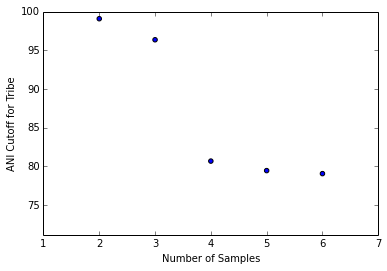

In [19]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'acI-B1')

These six samples appear to be enough. What about tribe acI-A7, for which we have 4 samples?

Sampling tribe acI-A7 with sample size 2.
The worst-case pairwise minimum ANI is: 96.2
Sampling tribe acI-A7 with sample size 3.
The worst-case pairwise minimum ANI is: 88.21
Sampling tribe acI-A7 with sample size 4.
The worst-case pairwise minimum ANI is: 87.13


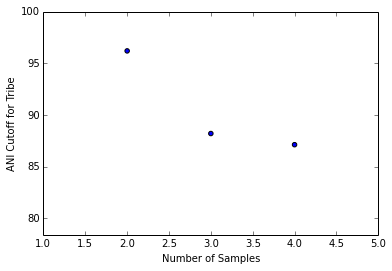

In [20]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGsforANI.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.allWorstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'acI-A7')

Having one more SAG would give us more confidence in the ANI cutoff.

## Reverse Ecology Analysis on Merged Genomes

When the above analysis is complete, we will have sets of genomes whose metabolic network models can be merged to give a more comprehensive model for each tribe. For now, we will only merge graphs for those SAGs belonging to the same tribe.

First import the necessary preliminaries and custom functions.

In [21]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import graphFunctions as gf
import metadataFunctions as mf
import sbmlFunctions as sf
import seedFunctions as ef

# Define local folder structure for data input and processing.
rawModelDir = 'ProcessedModelFiles'
processedDataDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'
externalDataDir = 'ExternalData'

First read in a file listing {lineage, clade, tribe} for each sample and aggregate all genomes belonging to the same tribe. The current input file taxonomySAGs.csv contains classifications for the SAGs only.

In [22]:
tribeSampleDict =  mf.importTaxonomy('../ExternalData/taxonomySAGs.csv')
tribeSampleDict

Importing taxonomy


{'Iluma-A2': ['AAA027E14'],
 'Iluma-B1': ['AAA027L17'],
 'Luna1-A2': ['AAA028P02'],
 'Luna1-A4': ['AAA028C09'],
 'acI-A1': ['AAA027M14', 'AAA278O22'],
 'acI-A5': ['AAA028G02', 'AAA044O16'],
 'acI-A6': ['AAA028E20', 'AAA028I14'],
 'acI-A7': ['AAA023J06', 'AAA024D14', 'AAA041L13', 'AAA044N04'],
 'acI-B1': ['AAA023D18',
  'AAA027J17',
  'AAA027L06',
  'AAA028A23',
  'AAA278I18',
  'AB141P03'],
 'acI-B4': ['AAA044D11'],
 'acSTL-A1': ['AAA027D23'],
 'acTH1-A1': ['AAA027F04', 'AAA028N15']}

Then, merge the metabolic network graphs for the samples from each tribe. Each sample is converted to a graph object and merged with the previous graph. The final graph is written to file.

In [23]:
gf.createTribalGraph(tribeSampleDict, processedDataDir, rawModelDir)

Merging genomes from individual tribes


The remaining code operates similarly to the RE analysis using all individual genomes. The metabolic network graphs corresponding to each tribe are imported:

In [24]:
dirList = mf.getDirList('../'+processedDataDir)
numSubDir = len(dirList)

Compute summary statistics on the size of each tribe's network graph.

Computing graph statistics


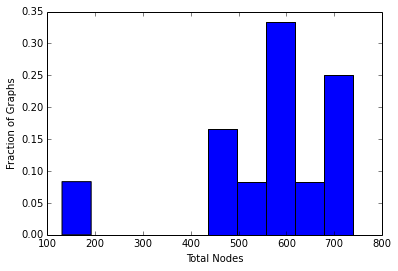

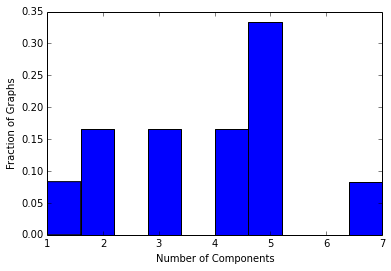

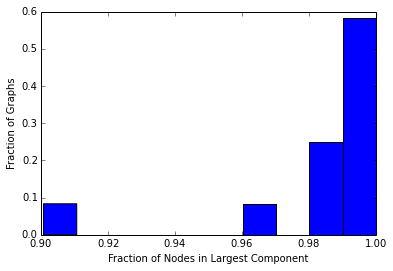

In [25]:
graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, processedDataDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

Convert each network graph to its largest component.

In [26]:
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)

Reducing to largest component


Compute seed sets and plot summary statistics.

Computing seed sets


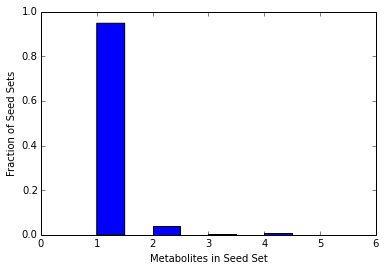

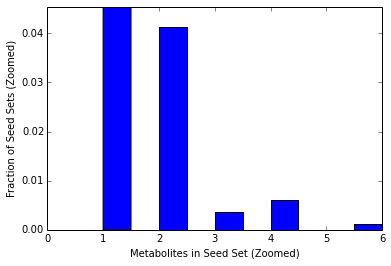

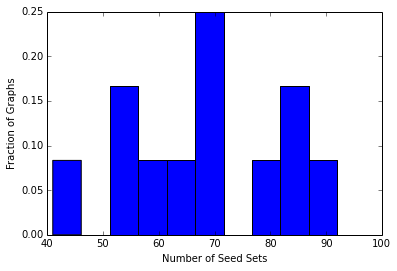

In [27]:
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
gf.plotSeedStatsForTribes(seedSetList, reducedGraphStatArray)

Aggregate the seed compounds for all tribes into a single matrix and write the results to file.

In [28]:
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

Consolidate seed sets
Computing normalized seed counts


Cluster the seed profiles and create the dendrogram:

Computing dendrogram


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371 UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


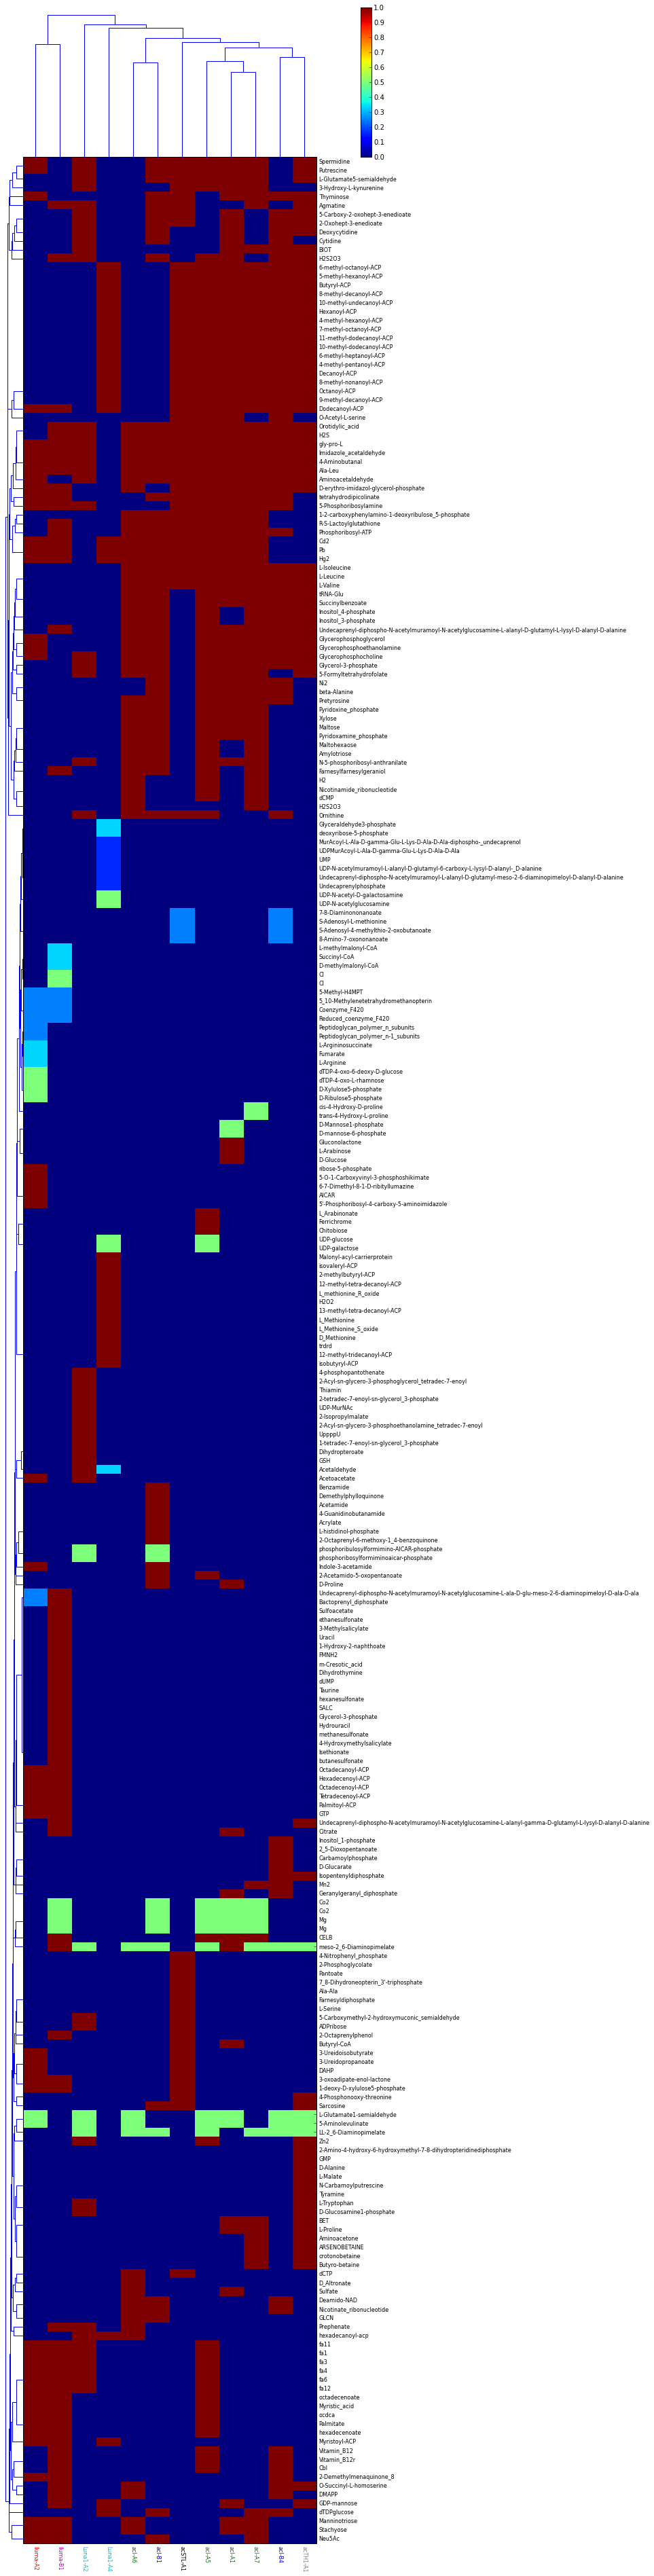

In [29]:
ef.clusterSeedSets(seedMatrixDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv')

Genomes in the above clustergram are colored as follows:

acI-A: green  
acI-B: blue  
acIV-A: red  
acIV-B: maroon  
acSTL-A: black  
acTH1-A: grey  
Luna1-A:  cyan  

And here is just the dendrogram for genomes:

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1004 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1011 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.


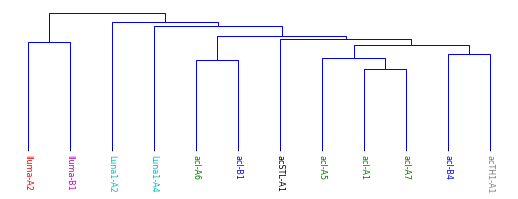

In [30]:
ef.clusterOnly(seedMatrixDF, dirList, externalDataDir, 'tribalColors.csv')

Compute the competidion index

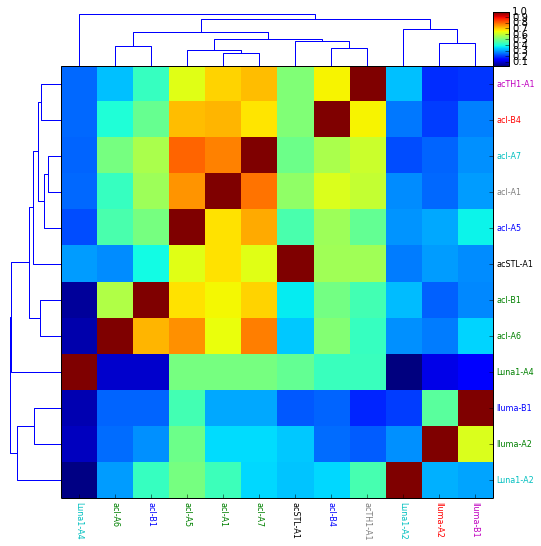

In [31]:
metabCompeteDF = ef.computeMetabCompete(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabCompeteDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicCompetition.png')

Compute the cooperation index:

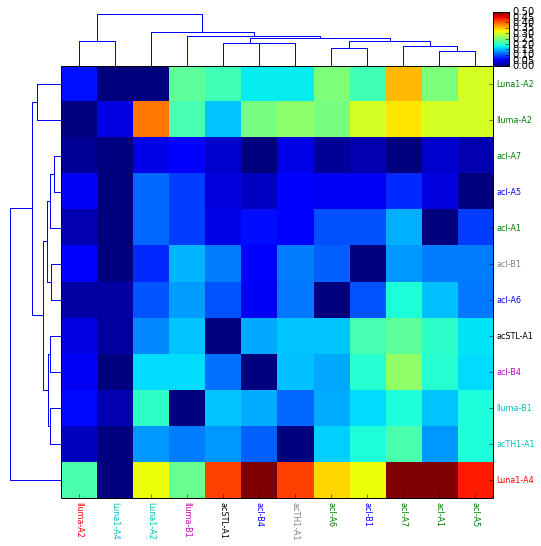

In [32]:
metabComplementDF = ef.computeMetabComplement(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabComplementDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicComplementarity.png')

We are currently analyzing the seed profiles to look for shared features of the actinobacterial lineage, and unique features of each tribe. 


** TO DO **
1. Provide an illustration of what the "merging" process looks like for metabolic network graphs.